In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file = h5py.File("masked dataset/image_set_mat/1.mat", "r")
list(file.keys())

['cjdata']

Top-level keys: ['cjdata']

Fields in 'cjdata':
PID: shape (6, 1), dtype uint16
image: shape (512, 512), dtype int16
label: shape (1, 1), dtype float64
tumorBorder: shape (1, 38), dtype float64
tumorMask: shape (512, 512), dtype uint8


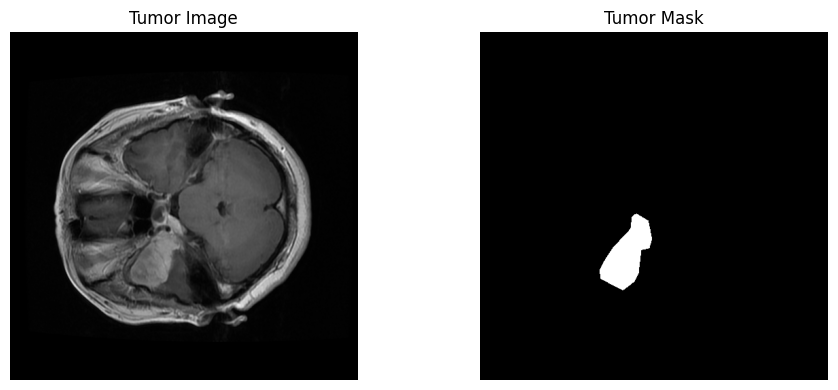

Image shape: (512, 512)
Mask shape: (512, 512)
Label: 1
Tumor Border Coordinates (length): 38
Tumor Border Coordinates: [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]


In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

data_path = "masked dataset/image_set_mat/1.mat"

with h5py.File(data_path, 'r') as f:
    print("Top-level keys:", list(f.keys()))  

    cjdata = f['cjdata']

    print("\nFields in 'cjdata':")
    for key, val in cjdata.items():
        print(f"{key}: shape {val.shape}, dtype {val.dtype}")

    img_ref = cjdata['image'][()]
    img = np.array(img_ref).astype(np.float32)
    img = img / 255.0 

    label_ref = cjdata['label']
    label = np.array(label_ref).squeeze().astype(int)

    mask_ref = cjdata['tumorMask'][()]
    mask = np.array(mask_ref).astype(np.float32)

    border_ref = cjdata['tumorBorder']
    coords = np.array(border_ref).squeeze()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Tumor Image")
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Tumor Mask")
plt.axis('off')
plt.imshow(mask, cmap='gray')

plt.tight_layout()
plt.show()

print("Image shape:", img.shape)
print("Mask shape:", mask.shape)
print("Label:", label)
print("Tumor Border Coordinates (length):", len(coords))
print("Tumor Border Coordinates:", coords)


In [ ]:
import h5py
import numpy as np
from PIL import Image
from pathlib import Path

# Paths — change these to your folders
input_folder = Path("masked dataset/image_set_mat")
output_root = Path("unet_dataset")

# Labels as folder names
label_names = {
    1: "meningioma",
    2: "glioma",
    3: "pituitary"
}

output_root.mkdir(parents=True, exist_ok=True)

# Loop over all .mat files
for mat_file in input_folder.glob("*.mat"):
    with h5py.File(mat_file, 'r') as f:
        cjdata = f['cjdata']
        
        # Load image, transpose (MATLAB stores column-major)
        img = np.array(cjdata['image']).T.astype(np.float32)
        # Normalize image to 0-255 uint8
        img_norm = 255 * (img - img.min()) / (img.max() - img.min())
        img_uint8 = img_norm.astype(np.uint8)
        
        # Load mask (already binary)
        mask = np.array(cjdata['tumorMask']).T.astype(np.uint8) * 255  # scale mask to 0-255
        
        # Load label
        label = int(cjdata['label'][0][0])
        img_folder = output_root / "images" / label_names[label]
        mask_folder = output_root / "masks" / label_names[label]
        img_folder.mkdir(parents=True, exist_ok=True)
        mask_folder.mkdir(parents=True, exist_ok=True)
        
        # Convert to PIL images
        img_pil = Image.fromarray(img_uint8)
        mask_pil = Image.fromarray(mask)
        
        # Save image and mask
        img_pil.save(img_folder / f"{mat_file.stem}.jpg")
        mask_pil.save(mask_folder / f"{mat_file.stem}.png")
        

print("Done converting all files.")


Done converting all files.


: 